In [4]:
!pip install tensorflow

In [5]:
import tensorflow as tf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
mobilenet_path = '/content/drive/MyDrive/mobilenetv3_large_web_model.keras'
efficientnet_path = '/content/drive/MyDrive/Efficient_classify_v2b3.keras'

In [6]:
# Common parameters
testpath = '/content/drive/MyDrive/modified-dataset/test'
batch_size = 32  # Adjust based on what you used before

# For MobileNetV3Large (128x128)
datatest_mobile = tf.keras.utils.image_dataset_from_directory(
    testpath,
    shuffle=False,
    image_size=(128, 128),
    batch_size=batch_size
)

# For EfficientNetV2B3 (300x300)
datatest_efficient = tf.keras.utils.image_dataset_from_directory(
    testpath,
    shuffle=False,
    image_size=(300, 300),
    batch_size=batch_size
)

# Save class names
class_names = datatest_mobile.class_names

Found 300 files belonging to 10 classes.
Found 300 files belonging to 10 classes.


In [7]:
# Load models
mobilenet_model = tf.keras.models.load_model(mobilenet_path)
efficientnet_model = tf.keras.models.load_model(efficientnet_path)

# Evaluate MobileNet
print("📊 MobileNetV3Large Evaluation:")
mobile_loss, mobile_acc = mobilenet_model.evaluate(datatest_mobile)
print(f"✅ Accuracy: {mobile_acc:.4f}")

# Evaluate EfficientNet
print("\n📊 EfficientNetV2B3 Evaluation:")
effnet_loss, effnet_acc = efficientnet_model.evaluate(datatest_efficient)
print(f"✅ Accuracy: {effnet_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'Adam', because it has 38 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 52 variables whereas the saved optimizer has 102 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


📊 MobileNetV3Large Evaluation:
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.9143 - loss: 0.2739
✅ Accuracy: 0.9167

📊 EfficientNetV2B3 Evaluation:
10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 6s/step - accuracy: 0.9768 - loss: 0.1207
✅ Accuracy: 0.9800


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def show_metrics(model, dataset, model_name="Model"):
    y_true = np.concatenate([y.numpy() for x, y in dataset], axis=0)
    y_pred = np.argmax(model.predict(dataset), axis=1)

    print(f"\n📄 Classification Report - {model_name}")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step

📄 Classification Report - MobileNetV3Large
                 precision    recall  f1-score   support

        Battery       0.96      0.83      0.89        30
       Keyboard       1.00      1.00      1.00        30
      Microwave       0.87      0.90      0.89        30
         Mobile       1.00      1.00      1.00        30
          Mouse       0.91      0.97      0.94        30
            PCB       0.97      0.97      0.97        30
         Player       0.91      0.70      0.79        30
        Printer       0.78      0.93      0.85        30
     Television       0.87      0.90      0.89        30
Washing Machine       0.94      0.97      0.95        30

       accuracy                           0.92       300
      macro avg       0.92      0.92      0.92       300
   weighted avg       0.92      0.92      0.92       300



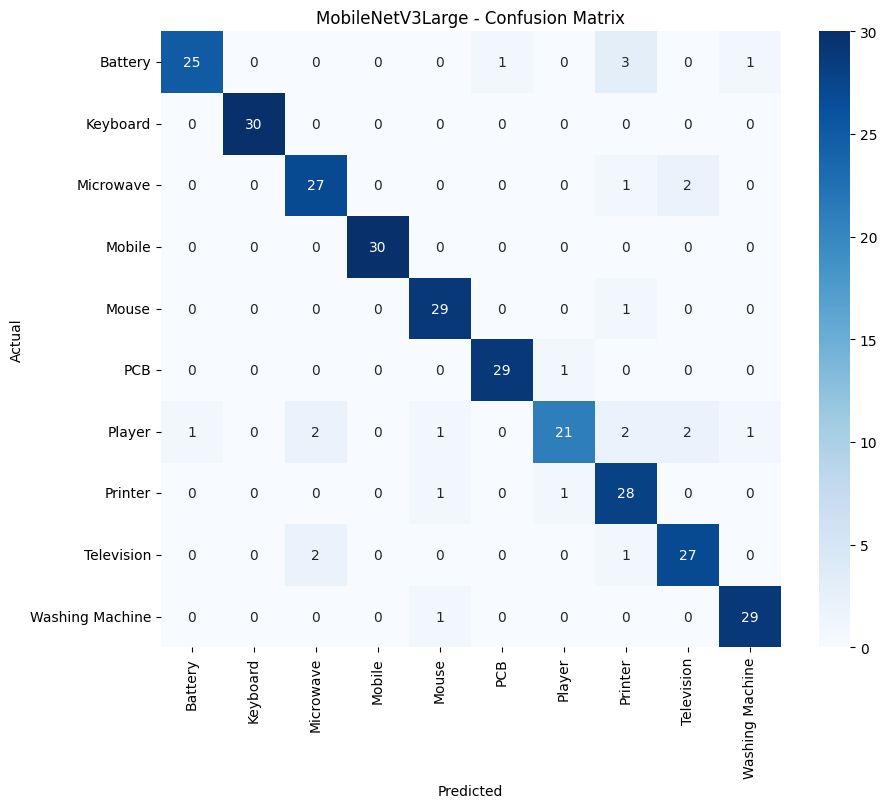

In [10]:
show_metrics(mobilenet_model, datatest_mobile, "MobileNetV3Large") # Metrics for MobileNetV3Large

10/10 ━━━━━━━━━━━━━━━━━━━━ 71s 7s/step

📄 Classification Report - EfficientNetV2B3
                 precision    recall  f1-score   support

        Battery       0.93      0.93      0.93        30
       Keyboard       1.00      1.00      1.00        30
      Microwave       0.97      1.00      0.98        30
         Mobile       1.00      1.00      1.00        30
          Mouse       0.97      1.00      0.98        30
            PCB       1.00      0.97      0.98        30
         Player       1.00      1.00      1.00        30
        Printer       0.97      1.00      0.98        30
     Television       1.00      0.93      0.97        30
Washing Machine       0.97      0.97      0.97        30

       accuracy                           0.98       300
      macro avg       0.98      0.98      0.98       300
   weighted avg       0.98      0.98      0.98       300



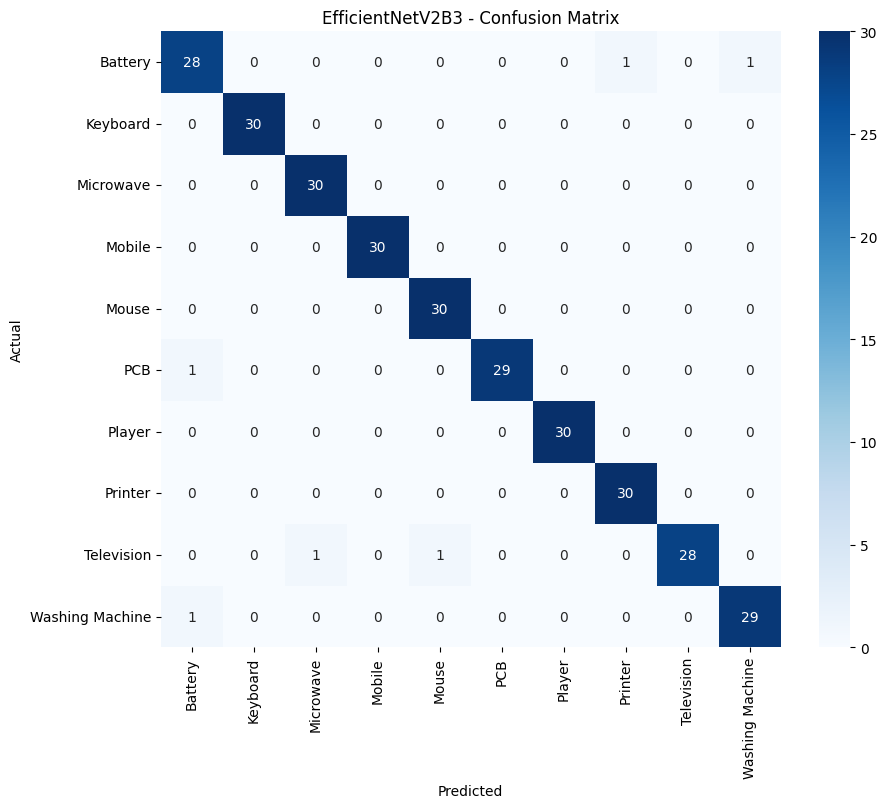

In [11]:
show_metrics(efficientnet_model, datatest_efficient, "EfficientNetV2B3") # Metrics for EfficientNetV2B3